# ECG Signal Classification with the k-NN Algorithm

# 1. Objective

Implement and use the k-NN algorithm for classification of various
signals.

# 2. Theoretical aspects

## 2.1 ML decision with multiple samples in Gaussian noise

In a detection problem with Gaussian noise, we have seen in the lectures
that decision with the Maximum Likelihood criterion comes down to
**choosing the smallest distance**: $$
\providecommand{\grtlessH}{\underset{{H_0}}{\overset{H_{1}}{\gtrless}}}
 | r(t_0) - s_0(t_0) | \grtlessH | r(t_0) - s_1(t_0) |
$$

What happens when we have **multiple samples**?

1.  We have vectors of samples: $\mathbf{r}, \mathbf{s_0}, \mathbf{s_1}$
    (bold font = it is a vector)
2.  The distance between any two vectors $\mathbf{a}$ and $\mathbf{b}$
    is the **Euclidean distance**: $$
    d(\mathbf{a}, \mathbf{b}) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... (a_n - b_n)^2}
    $$
3.  We use the same distance-based rule: $$
      \providecommand{\grtlessH}{\underset{{H_0}}{\overset{H_{1}}{\gtrless}}}
      d(\mathbf{r}, \mathbf{s_0}) \grtlessH d(\mathbf{r}, \mathbf{s_1})
      $$ The smallest distance wins.

## 2.2 The k-NN algorithm

Suppose we have a set of **training signals** whose classes are known
beforehand. For example:

-   100 signals of class A (e.g. ECG heart signals from healthy persons)
-   100 signals of class B (e.g. ECG heart signals from ill persons)
-   maybe more classes

We have a new signal X. We need to decide to which class it belongs
(class A, or class B, etc).

We can use **the k-NN algorithm**:

1.  Compute the distances from X to all the signals in the training set
2.  Choose the **closest $k$ neighbors**, take the class of the majority
    of them (e.g. majority voting). Decide that this is the class of
    $X$.

A visual illustration[1] is below:

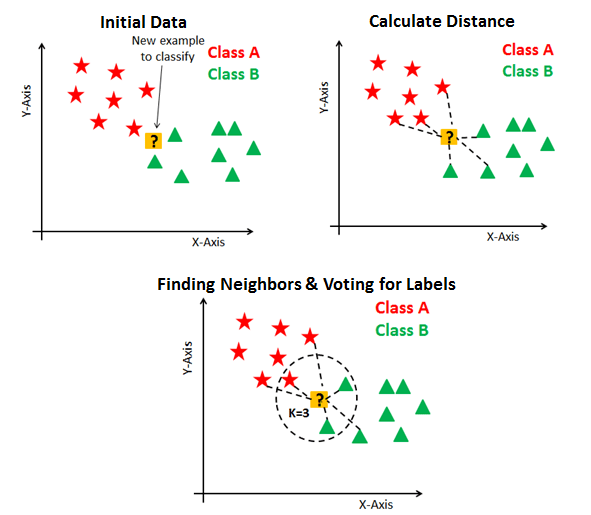

## 2.3 Datasets organization

Usually, we have at our disposal a large class of signals whose classes
are known. The data is randomly split into:

-   a **training set**: this data is used for the majority voting
-   a **test set**: used only for **evaluation** of the algorithm
    performance. This data should never be used for training (the
    algorithm should never have seen this data before the testing).
-   (optional) a **cross-validation set**: a subset of the training set,
    used to determine which values of $k$ work best

The datasets are obtained by randomly splitting all the signals
available at the beginning. Common sizes of the datasets should be
around $70\%$ for the training set, $15\%$ for the cross-validation set,
$15\%$ for the testing set.

# 3. Practical setup

## 3.1 k-NN algorithm in Matlab

Matlab has several implementations of the k-NN algorithm available.

For our purposes we can use the function `knnsearch()`.

The call below finds the 10 nearest neighbors in X for each vector in Y,
and returns the indices of the nearest neighbors in Idx, and the
distances in D. `X` and `Y` contain the vectors on rows

``` matlab
[Idx, D] = knnsearch(X, Y, 'K', 10);   % find 1- nearest neighbors for vectors in Y
```

One can also use the `fitcknn()` function, which is tailored for
classification. `fitknn()` creates the model, and `predict()` will
output the predicted class for one or more test vectors.

``` matlab
Mdl = fitcknn(X,Y, 'NumNeighbors', 3);    % use 3 neighbors
label = Mdl.predict(test_data);
```

-   `X` = training data, each row is a vector
-   `Y` = classes of the training data, each value = class of
    corresponding vector
-   `test_data` = test data, each row is a vector for which we predict
    the class

## 3.2 Data for this laboratory

In this laboratory we will use ECG signal data from the [MIT-BIH
Arrhythmia database](https://physionet.org/content/mitdb/1.0.0/).

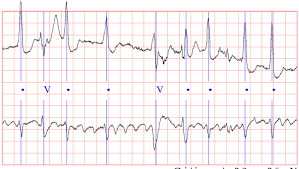

(image from https://archive.physionet.org/physiobank/database/mitdb/)

The excerpt provided for this lab contains electrocardiographic (ECG)
signals from **4 classes**, with **120 signals per class**. The 4
classes are:

1.  1 class with ECG from healthy persons
2.  3 classes with 3 different types of arrhythmia (irregular/abnormal
    heart beat)

The ECG signals provided here are preprocessed:

-   all signals are segmented in **segments** corresponding to **one
    heart beat**
-   the signals are resized to **fixed length** 256 samples
-   the signals are resized so that the peak R wave is located at the
    center of the signal
-   the continuous component of all signals has been removed
-   the signals have been normalized to norm equal to 1

The signals are randomly split into two sets:

-   training set: `ECG_train.mat`, 400 signals = 4 classes $\times$ 100
    signals each
-   test set: `ECG_test.mat`, 80 signals = 4 classes $\times$ 20 signals
    each

# 4. Exercises

1.  Load the data files `ECG_train.mat` and `ECG_test.mat`. Explore the
    dataset:

    -   display 3 signals from each class contained in the training set.
        Try to figure out some visual differences.
    -   display the first signal from the test dataset. Try to determine
        visually to what class it belongs to.

2.  Take the first signal from the test set, and manually classify it
    with k-NN using k = 5:

    -   compute the Euclidean distance to all the vectors in the
        trainset
    -   find the smallest 5 values and the class of the 5 corresponding
        vectors
    -   find the class of the test signal (in words, not in code)

3.  Predict the class of the same signal using the built-in functions
    `fitcknn()` and `predict()`

4.  Compute the confusion matrix of the classification.

    -   Use the built-in functions `fitcknn()` and `predict()` to
        predict the class for all test signals. Use different values for
        $k$: $k=1$, then $k=5$, then $k=15$.

    -   Compare the classification results against the ground truth and
        compute the **confusion matrix** A:

        $A_{ij}$ = how many signals of class $i$ are predicted to be in
        class $j$.

5.  Repeat exercise 3, this time adding a variable amount of gaussian
    noise to the test signals. How does the performance change?

6.  Repeat exercise 4., this time adding a DC component to the test
    signals. How does the performance change?

Old exercises:

1.  Implement a function `[class] = myKNN(signal, k, trainset)` for
    performing k-NN classification of a signal:

    -   the function takes as input an unclassified signal `signal`, the
        parameter value `k`, and the training set matrix `trainset`
    -   the function computes the Euclidean distance between `signal`
        and each vector from the training set
    -   the output `class` is defined by the majority of the $k$ nearest
        neighbours of the signal

# 5. Final questions

1.  How does the confusion matrix look like in the ideal case? (perfect
    classification)

2.  Is there a problem in case the classes are imbalanced? (different
    number of signals for the classes)

[1] image from [’KNN Classification using Scikit-learn”, Avinash
Navlani](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)